In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [56]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = 'C:\DS practice', untar = True)  #untar is unzip 

In [57]:
data_dir

'C:\\DS practice\\datasets\\flower_photos'

In [58]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/DS practice/datasets/flower_photos')

In [59]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/DS practice/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('C:/DS pract

In [60]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [61]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/DS practice/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

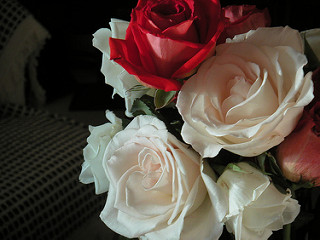

In [62]:
PIL.Image.open(str(roses[1]))

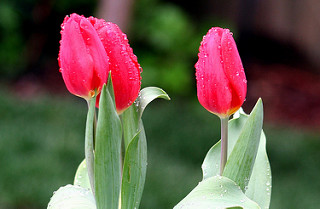

In [63]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [64]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [65]:
flowers_image_dict['dandelion']

[WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('C:/DS practice/datasets/flower_photos/dandelion/10749991

In [66]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [67]:
str(flowers_image_dict['roses'][0])

'C:\\DS practice\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [68]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape    # 3-dimensional x,y, rgb channel

(240, 179, 3)

In [69]:
cv2.resize(img,(180,180))

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [70]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [71]:
X, y = [] , []

for flower_name, images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [72]:
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [73]:
X = np.array(X)
y = np.array(y)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [75]:
len(X_train)

2752

In [76]:
len(X_test)

918

In [77]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [78]:
X_train_scaled

array([[[[0.26666667, 0.30980392, 0.30196078],
         [0.24705882, 0.2745098 , 0.24705882],
         [0.23529412, 0.24313725, 0.21960784],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.22352941, 0.24313725, 0.23529412],
         [0.23921569, 0.25098039, 0.23529412],
         [0.23529412, 0.23921569, 0.21568627],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.23921569, 0.22745098, 0.22352941],
         [0.25098039, 0.25098039, 0.23137255],
         [0.23137255, 0.23137255, 0.20784314],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16078431, 0.14901961]],

        ...,

        [[0.19215686, 0.4745098 , 0.36470588],
         [0.15686275, 0.25490196, 0.2       ]

In [79]:
num_classes = 5
model = Sequential([
    
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),  #16 filters and size 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),   #32 filters and size 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),   #64 filters and size 3*3
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),    # 128 neurons hit and trial
    layers.Dense(num_classes)
    
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])





In [27]:
model.fit(X_train_scaled,y_train, epochs = 5)

Epoch 1/5


86/86 [==============================] - 13s 124ms/step - loss: 1.3112 - accuracy: 0.4477
Epoch 2/5
86/86 [==============================] - 12s 134ms/step - loss: 0.9844 - accuracy: 0.6185
Epoch 3/5
86/86 [==============================] - 12s 143ms/step - loss: 0.8063 - accuracy: 0.6893
Epoch 4/5
86/86 [==============================] - 12s 139ms/step - loss: 0.5907 - accuracy: 0.7834
Epoch 5/5
86/86 [==============================] - 13s 146ms/step - loss: 0.4192 - accuracy: 0.8561


In [28]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 36ms/step - loss: 1.0269 - accuracy: 0.6296


[1.0269181728363037, 0.6296296119689941]

In [29]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 36ms/step


array([[ 3.5166438 ,  8.725221  ,  1.1785747 , -4.5713034 ,  0.90341246],
       [ 4.684411  , -0.52129793, -0.5220094 , -0.7733625 ,  2.711495  ],
       [-0.13034546,  1.9048817 ,  5.2727427 , -1.40657   , -0.49660397],
       ...,
       [ 2.0550246 , -1.9705234 ,  0.98671216,  4.7600694 ,  0.5984304 ],
       [ 2.6058373 ,  2.041437  , -0.10969993,  0.02351451, -0.19673926],
       [ 1.4721546 , -4.9535346 ,  1.5821368 ,  4.91071   ,  2.53463   ]],
      dtype=float32)

In [30]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.4346691e-03, 9.9364084e-01, 5.2452076e-04, 1.6696383e-06,
       3.9834669e-04], dtype=float32)>

In [31]:
np.argmax(score)

1

In [32]:
y_test[0]

1

### data augmentation

In [54]:
data_augmentation = keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(180,
                                                            180,
                                                            3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

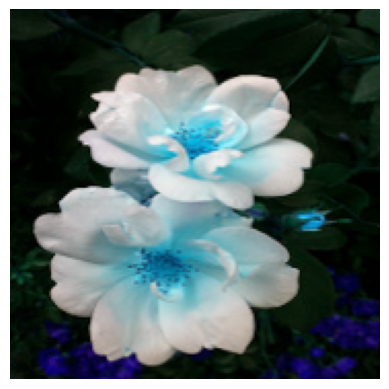

In [46]:
plt.axis('off')
plt.imshow(X[0])

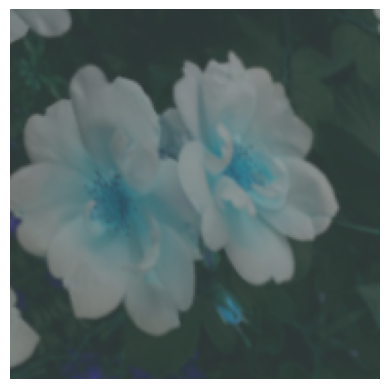

In [47]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))   #from tensor convert it to numpy

In [42]:
data_augmentation(X[0])

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[  8.991323 ,  22.363913 ,   9.270765 ],
        [  8.854548 ,  22.227137 ,   9.695516 ],
        [  8.833843 ,  22.186295 ,  10.113285 ],
        ...,
        [  1.9269913,   8.926991 ,   1.9269913],
        [  1.4683762,   8.468376 ,   1.4683762],
        [  0.9068527,   7.898177 ,   0.9068527]],

       [[  5.671691 ,  16.93481  ,   5.619386 ],
        [  5.9461584,  16.946272 ,   5.877063 ],
        [  6.0709724,  16.824871 ,   5.9479218],
        ...,
        [  2.       ,   9.       ,   2.       ],
        [  1.8077391,   8.807739 ,   1.8077391],
        [  1.5092251,   8.509225 ,   1.5092251]],

       [[  2.7636638,  12.042061 ,   2.6906548],
        [  3.1025262,  12.013807 ,   2.5410008],
        [  3.1352081,  11.749554 ,   2.1819496],
        ...,
        [  1.783802 ,   8.783802 ,   1.783802 ],
        [  1.783802 ,   8.783802 ,   1.783802 ],
        [  1.710799 ,   8.710799 ,   1.710799 ]],

       ...,

     

In [43]:
data_augmentation(X)[0]   # data_augmentation expects 2D array so call it on whole X vector and use index

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[8.7736472e-03, 3.0175474e+00, 9.9114799e-01],
        [1.5450623e-02, 3.7631416e+00, 2.5890762e-01],
        [8.8568674e-03, 3.5224023e+00, 8.8520050e-03],
        ...,
        [3.5046983e+00, 1.3495851e+01, 1.5002747e+00],
        [3.7409308e+00, 1.3745438e+01, 1.7454376e+00],
        [2.9646740e+00, 1.2964835e+01, 1.0088501e+00]],

       [[1.4908752e+00, 3.0000000e+00, 1.0000000e+00],
        [9.3519801e-01, 2.6340830e+00, 2.5456238e-01],
        [3.7292355e-01, 2.0093994e+00, 0.0000000e+00],
        ...,
        [2.3815041e+00, 1.3126942e+01, 1.1269417e+00],
        [1.8886455e+00, 1.2254562e+01, 6.3408315e-01],
        [2.2698481e+00, 1.1506711e+01, 1.0352389e+00]],

       [[1.0005493e+00, 2.0005493e+00, 1.0000000e+00],
        [6.2762576e-01, 1.2551117e+00, 2.5456238e-01],
        [7.4972558e-01, 1.0002748e+00, 2.4972542e-01],
        ...,
        [1.9999998e+00, 1.2250549e+01, 7.4999976e-01],
        [2.1268017e+00

In [80]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),  #16 filters and size 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),   #32 filters and size 3*3
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),   #64 filters and size 3*3
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),    # 128 neurons hit and trial
    layers.Dense(num_classes)
    
])


model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             optimizer = 'adam',
             metrics = ['accuracy'])


In [82]:
model.fit(X_train_scaled, y_train, epochs= 5)

Epoch 1/5
86/86 [==============================] - 21s 201ms/step - loss: 1.2928 - accuracy: 0.4339
Epoch 2/5
86/86 [==============================] - 19s 225ms/step - loss: 1.0357 - accuracy: 0.5858
Epoch 3/5
86/86 [==============================] - 18s 210ms/step - loss: 0.9472 - accuracy: 0.6272
Epoch 4/5
86/86 [==============================] - 18s 210ms/step - loss: 0.8586 - accuracy: 0.6642
Epoch 5/5
86/86 [==============================] - 18s 213ms/step - loss: 0.7963 - accuracy: 0.6930


In [83]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 34ms/step - loss: 0.9549 - accuracy: 0.6438


[0.9548622965812683, 0.6437908411026001]